In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

data_quantile_model = np.load('data/maemis_seed0.npz',allow_pickle=True)

print(data_quantile_model.files)

predeictions_quantile = data_quantile_model['prediction']
truths_quantile = data_quantile_model['truth']
print(predeictions_quantile.shape)
print(truths_quantile.shape)
#averaged_predictions_quantile = np.mean(predeictions_quantile, axis=-1)
#print(averaged_predictions_quantile.shape)
averaged_predeictions_quantile = predeictions_quantile[:,:,:,1]
down_predictions_quantile = predeictions_quantile[:,:,:,0]
up_predictions_quantile = predeictions_quantile[:,:,:,2]
print(averaged_predeictions_quantile.shape)

['mis', 'width', 'mse', 'rmse', 'mae', 'prediction', 'truth']
(12, 6912, 207, 3)
(12, 6912, 207)
(12, 6912, 207)


In [2]:
data_gpde_quantile_model = np.load('data/gpde_maemis_seed0.npz',allow_pickle=True)

print(data_gpde_quantile_model.files)

predeictions_gpde_quantile = data_gpde_quantile_model['prediction']
print(predeictions_gpde_quantile.shape)

averaged_predeictions_gpde_quantile = predeictions_gpde_quantile[:,:,:,1]
down_predictions_gpde_quantile = predeictions_gpde_quantile[:,:,:,0]
up_predictions_gpde_quantile = predeictions_gpde_quantile[:,:,:,2]
print(averaged_predeictions_gpde_quantile.shape)

['mis', 'width', 'mse', 'rmse', 'mae', 'prediction', 'truth']
(12, 6912, 207, 3)
(12, 6912, 207)


In [3]:
data_gpde_quantile_phy_model = np.load('data/gpde_maemis_phy_seed0.npz',allow_pickle=True)


print(data_gpde_quantile_phy_model.files)

predeictions_gpde_quantile_phy = data_gpde_quantile_phy_model['prediction']
print(predeictions_gpde_quantile_phy.shape)

averaged_predeictions_gpde_quantile_phy = predeictions_gpde_quantile_phy[:,:,:,1]
down_predictions_gpde_quantile_phy = predeictions_gpde_quantile_phy[:,:,:,0]
up_predictions_gpde_quantile_phy = predeictions_gpde_quantile_phy[:,:,:,2]
print(averaged_predeictions_gpde_quantile_phy.shape)

['mis', 'width', 'mse', 'rmse', 'mae', 'prediction', 'truth']
(12, 6912, 207, 3)
(12, 6912, 207)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


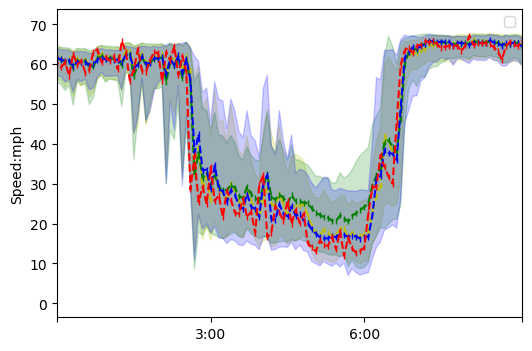

In [4]:
i=7
start_time = i * 24 * 12
num_days = 12 * 24 *2
end_time = start_time + num_days
time_stamp=0
loc = 130

result_quantile = averaged_predeictions_quantile[time_stamp,start_time:end_time,loc]
result_down_quantile = down_predictions_quantile[time_stamp,start_time:end_time,loc]
result_up_quantile = up_predictions_quantile[time_stamp,start_time:end_time,loc]


result_gpde_quantile = averaged_predeictions_gpde_quantile[time_stamp,start_time:end_time,loc]
result_gpde_down_quantile = down_predictions_gpde_quantile[time_stamp,start_time:end_time,loc]
result_gpde_up_quantile = up_predictions_gpde_quantile[time_stamp,start_time:end_time,loc]


result_gpde_quantile_phy = averaged_predeictions_gpde_quantile_phy[time_stamp,start_time:end_time,loc]
result_gpde_down_quantile_phy = down_predictions_gpde_quantile_phy[time_stamp,start_time:end_time,loc]
result_gpde_up_quantile_phy = up_predictions_gpde_quantile_phy[time_stamp,start_time:end_time,loc]

        
result_truth = truths_quantile[time_stamp,start_time:end_time,loc]

plt.figure(figsize=(6, 4))
plt.plot(result_quantile, linestyle='--', color='y', marker='|', markersize=4)#,label="quantile model")  
plt.plot(result_gpde_quantile, linestyle='--', color='g', marker='|', markersize=4)#,label="gpde quantile model")
plt.plot(result_gpde_quantile_phy, linestyle='--', color='b', marker='|', markersize=4)#,label="gpde quantile phy model")
plt.plot(result_truth, linestyle='--', color='r', marker='|', markersize=4)#,label="Truth")  
plt.fill_between(np.arange(len(result_quantile)), result_down_quantile, result_up_quantile, color='y', alpha=0.2)
plt.fill_between(np.arange(len(result_gpde_quantile)), result_gpde_down_quantile, result_gpde_up_quantile, color='g', alpha=0.2)
plt.fill_between(np.arange(len(result_gpde_quantile_phy)), result_gpde_down_quantile_phy, result_gpde_up_quantile_phy, color='b', alpha=0.2)
        
tick_positions = np.linspace(0, 576, 16, dtype=int)  
labels = [''] * len(tick_positions)  

        

#labels[2] = (f'06/{8+i}/2012')  
#labels[10] = (f'06/{9+i}/2012')  
labels[11] = ('3:00')
labels[12] = ('6:00')
#labels[13] = ('9:00')

       
plt.xticks(tick_positions, labels)

plt.xlim(tick_positions[10], tick_positions[13])

#plt.ylim(63, 73)

#plt.xlabel('Regular Hours')
plt.ylabel('Speed:mph')
#plt.title(f'METR-LA Location {loc} Prediction')
#plt.xlabel('Rush Hours')
plt.legend()

plt.savefig('outputs/maemis_seperate1.png')
plt.show()